In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Initial counts: {'Potato_Late_blight': 1000, 'Potato_Early_blight': 1000, 'Potato_healthy': 152}
Needed augmentations: 848
Total images found for augmentation: 152
Total augmented images generated: 848


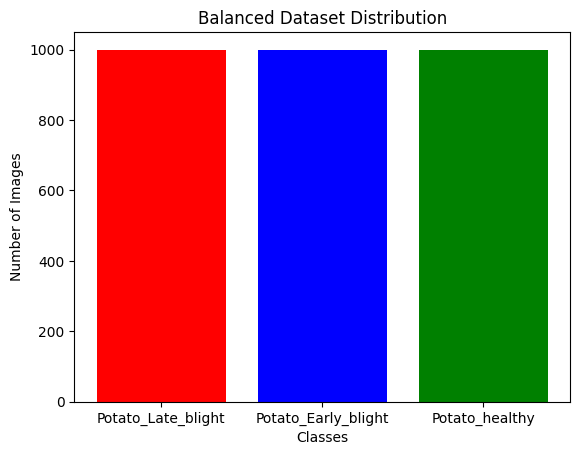

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Directory paths
base_dir = '/content/drive/MyDrive/CSE422_Project'

# Setup the data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def augment_images_in_batches(image_directory, save_directory, needed_augmentations, batch_size=32):
    image_filenames = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.upper().endswith('.JPG')]
    print("Total images found for augmentation:", len(image_filenames))
    generated_count = 0

    if image_filenames and needed_augmentations > 0:
        for _ in range((needed_augmentations + batch_size - 1) // batch_size):
            batch_filenames = image_filenames[:min(batch_size, needed_augmentations - generated_count)]
            images = np.array([img_to_array(load_img(fname)) for fname in batch_filenames])
            batches = datagen.flow(images, batch_size=len(images), save_to_dir=save_directory, save_prefix='aug', save_format='jpg')
            for i, batch in enumerate(batches):
                generated_count += 1
                if generated_count >= needed_augmentations:
                    break
            if generated_count >= needed_augmentations:
                break

    print("Total augmented images generated:", generated_count)

# Calculate initial counts and needed augmentations
initial_counts = {}
augment_dir = os.path.join(base_dir, 'Potato_healthy', 'augmented')
os.makedirs(augment_dir, exist_ok=True)

for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        initial_counts[folder] = len([f for f in os.listdir(folder_path) if f.upper().endswith('.JPG')])

needed_augmentations = 1000 - initial_counts['Potato_healthy']
print("Initial counts:", initial_counts)
print("Needed augmentations:", needed_augmentations)

# Perform augmentation
potato_healthy_dir = os.path.join(base_dir, 'Potato_healthy')
augment_images_in_batches(potato_healthy_dir, augment_dir, needed_augmentations)

# Update counts after augmentation
final_counts = initial_counts.copy()
final_counts['Potato_healthy'] += needed_augmentations

# Plotting the balanced dataset
plt.bar(final_counts.keys(), final_counts.values(), color=['red', 'blue', 'green'])
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Balanced Dataset Distribution')
plt.show()



In [ ]:
import os
import numpy as np
import shutil

def split_data(source_dir, train_dir, val_dir, test_dir, train_size=0.7, val_size=0.15):
    # Ensure target directories exist
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Collect all image files from source_dir and its subdirectories
    files = []
    for root, dirs, filenames in os.walk(source_dir):
        for filename in filenames:
            if filename.endswith('.JPG'):
                files.append(os.path.join(root, filename))

    # Shuffle the list to ensure random distribution
    np.random.shuffle(files)

    # Calculate split indices
    train_end = int(len(files) * train_size)
    val_end = train_end + int(len(files) * val_size)

    # Distribute files
    for f in files[:train_end]:
        shutil.copy(f, train_dir)
    for f in files[train_end:val_end]:
        shutil.copy(f, val_dir)
    for f in files[val_end:]:
        shutil.copy(f, test_dir)

base_dir = '/content/drive/MyDrive/CSE422_Project'
classes = ['Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy']

# Split data into training, validation, and testing folders
for cls in classes:
    src_dir = os.path.join(base_dir, cls)
    train_cls_dir = os.path.join(train_dir, cls)
    val_cls_dir = os.path.join(val_dir, cls)
    test_cls_dir = os.path.join(test_dir, cls)

    # Include images from the 'augmented' sub-folder if it exists
    if cls == 'Potato_healthy':
        augmented_dir = os.path.join(src_dir, 'augmented')
        if os.path.exists(augmented_dir):
            split_data(augmented_dir, train_cls_dir, val_cls_dir, test_cls_dir)

    # Process the main class folder
    split_data(src_dir, train_cls_dir, val_cls_dir, test_cls_dir)

print("Data splitting complete. Check directories for balance and presence of files.")



Data splitting complete. Check directories for balance and presence of files.


Found 2085 images belonging to 3 classes.
Found 806 images belonging to 3 classes.
Found 821 images belonging to 3 classes.
Epoch 1/10
66/66 [==============================] - 25s 315ms/step - loss: 0.9346 - accuracy: 0.5803 - val_loss: 0.5715 - val_accuracy: 0.7916
Epoch 2/10
66/66 [==============================] - 19s 283ms/step - loss: 0.4988 - accuracy: 0.8283 - val_loss: 0.4062 - val_accuracy: 0.8734
Epoch 3/10
66/66 [==============================] - 19s 295ms/step - loss: 0.3671 - accuracy: 0.8844 - val_loss: 0.3169 - val_accuracy: 0.9032
Epoch 4/10
66/66 [==============================] - 19s 290ms/step - loss: 0.2920 - accuracy: 0.9089 - val_loss: 0.2621 - val_accuracy: 0.9231
Epoch 5/10
66/66 [==============================] - 23s 355ms/step - loss: 0.2417 - accuracy: 0.9271 - val_loss: 0.2239 - val_accuracy: 0.9367
Epoch 6/10
66/66 [==============================] - 19s 289ms/step - loss: 0.2073 - accuracy: 0.9468 - val_loss: 0.1928 - val_accuracy: 0.9491
Epoch 7/10
66/66 [

<ipython-input-16-ad8c2aa433bc>:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_labels, rotation=90)
<ipython-input-16-ad8c2aa433bc>:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_labels)


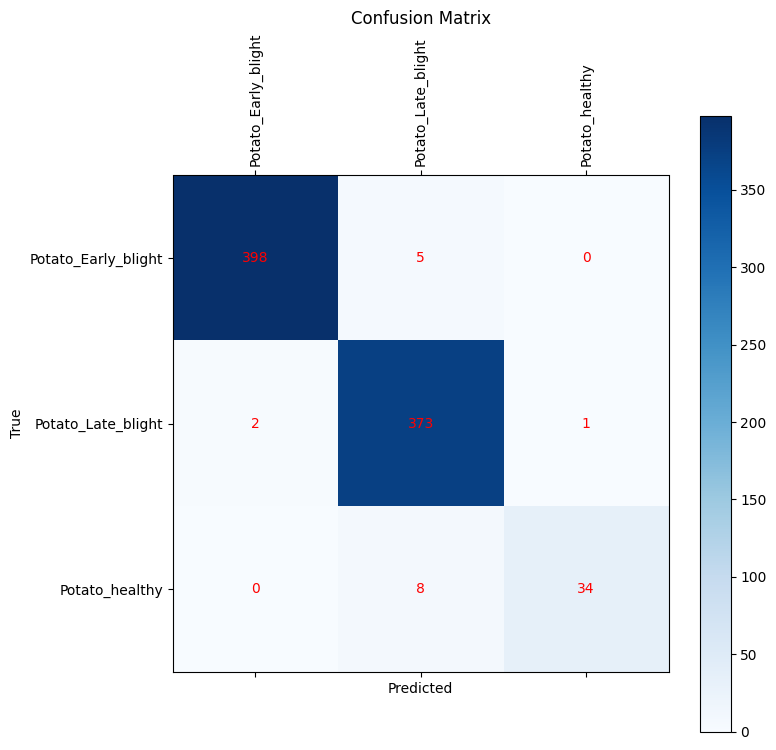

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Setup paths
base_dir = '/content/drive/MyDrive/CSE422_Project'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Setup ImageDataGenerators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Build and compile ResNet50 model
def build_model(num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze the convolutional base
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

num_classes = len(train_generator.class_indices)
model = build_model(num_classes)

# Callbacks for early stopping and saving the model
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, save_format='tf')
]

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=callbacks)

# Load best model weights
model.load_weights('best_model.keras')

# Evaluate the model on the test set
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate classification report and confusion matrix
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + class_labels, rotation=90)
ax.set_yticklabels([''] + class_labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='red')

plt.show()


Found 2085 images belonging to 3 classes.
Found 806 images belonging to 3 classes.
Found 821 images belonging to 3 classes.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
66/66 [==============================] - 31s 346ms/step - loss: 0.7997 - accuracy: 0.7424 - val_loss: 0.2204 - val_accuracy: 0.9156
Epoch 2/10
66/66 [==============================] - 19s 281ms/step - loss: 0.1806 - accuracy: 0.9357 - val_loss: 0.1258 - val_accuracy: 0.9578
Epoch 3/10
66/66 [==============================] - 19s 288ms/step - loss: 0.1189 - accuracy: 0.9612 - val_loss: 0.0865 - val_accuracy: 0.9715
Epoch 4/10
66/66 [==============================] - 19s 286ms/step - loss: 0.0896 - accuracy: 0.9712 - val_loss: 0.0704 - val_accuracy: 0.9789
Epoch 5/10
66/66 [==============================] - 20s 305ms/step - loss: 0.0675 - accuracy: 0.9818 - val_loss: 0.0510 - val_accuracy: 0.9864
Epoch 6/10
66/66 [==============================] - 19s 287ms/step - loss: 0.0544 - accuracy: 0.

<ipython-input-17-f8cdd879da57>:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_labels, rotation=90)
<ipython-input-17-f8cdd879da57>:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_labels)


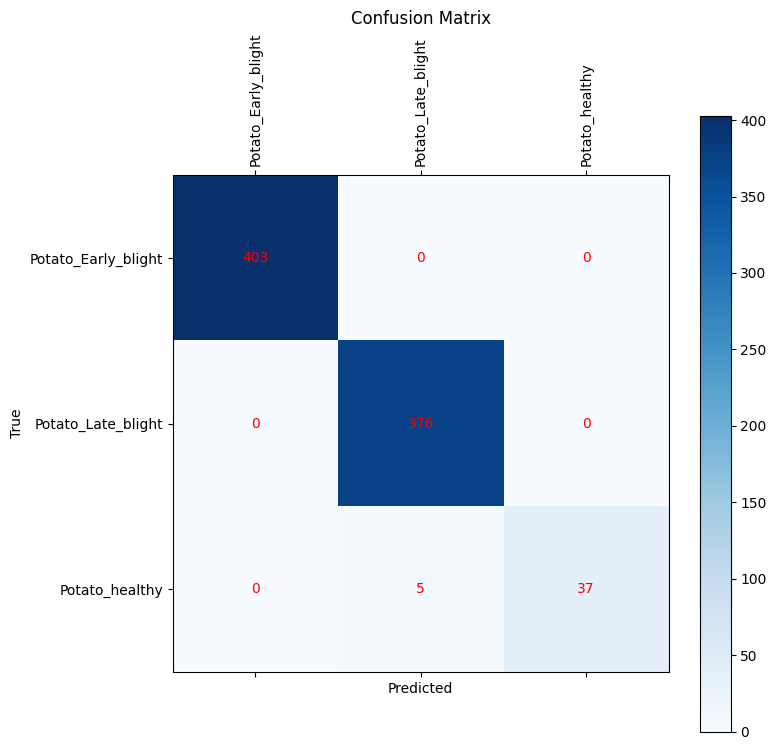

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Setup paths
base_dir = '/content/drive/MyDrive/CSE422_Project'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Setup ImageDataGenerators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Build and compile VGG-16 model
def build_model(num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze the convolutional base
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

num_classes = len(train_generator.class_indices)
model = build_model(num_classes)

# Callbacks for early stopping and saving the model
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
    ModelCheckpoint('vgg16_best_model.keras', monitor='val_loss', save_best_only=True, save_format='tf')
]

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=callbacks)

# Load best model weights
model.load_weights('vgg16_best_model.keras')

# Evaluate the model on the test set
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate classification report and confusion matrix
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + class_labels, rotation=90)
ax.set_yticklabels([''] + class_labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='red')

plt.show()


Found 2085 images belonging to 3 classes.
Found 806 images belonging to 3 classes.
Found 821 images belonging to 3 classes.
Epoch 1/10
66/66 [==============================] - 56s 665ms/step - loss: 0.4909 - accuracy: 0.8671 - val_loss: 6.7519 - val_accuracy: 0.4702
Epoch 2/10
66/66 [==============================] - 44s 673ms/step - loss: 0.2936 - accuracy: 0.9156 - val_loss: 11.0898 - val_accuracy: 0.4702
Epoch 3/10
66/66 [==============================] - 40s 610ms/step - loss: 0.2228 - accuracy: 0.9252 - val_loss: 7.7189 - val_accuracy: 0.4702
Epoch 4/10
66/66 [==============================] - 40s 608ms/step - loss: 0.1585 - accuracy: 0.9487 - val_loss: 7.6182 - val_accuracy: 0.4702
Epoch 5/10
66/66 [==============================] - 41s 622ms/step - loss: 0.1864 - accuracy: 0.9357 - val_loss: 5.0163 - val_accuracy: 0.4702
Epoch 6/10
66/66 [==============================] - 41s 624ms/step - loss: 0.1641 - accuracy: 0.9434 - val_loss: 2.3255 - val_accuracy: 0.4516
Epoch 7/10
66/66 

<ipython-input-18-16aab79eb0b8>:122: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_labels, rotation=90)
<ipython-input-18-16aab79eb0b8>:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_labels)


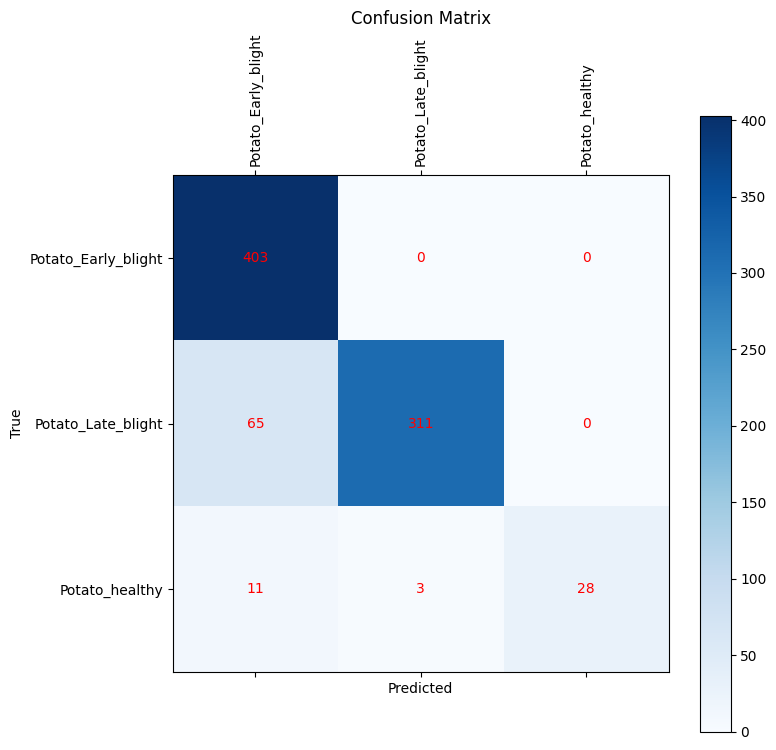

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Setup paths
base_dir = '/content/drive/MyDrive/CSE422_Project'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Setup ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Build a 15-layer CNN model
def build_model(num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), input_shape=(224, 224, 3)),
        Activation('relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3)),
        Activation('relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3)),
        Activation('relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3)),
        Activation('relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3)),
        Activation('relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(256, (3, 3)),
        Activation('relu'),
        BatchNormalization(),
        Conv2D(256, (3, 3)),
        Activation('relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(512),
        Activation('relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

num_classes = len(train_generator.class_indices)
model = build_model(num_classes)

# Callbacks for early stopping and saving the model
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
    ModelCheckpoint('custom_cnn_best_model.keras', monitor='val_loss', save_best_only=True, save_format='tf')
]

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=callbacks)

# Load best model weights
model.load_weights('custom_cnn_best_model.keras')

# Evaluate the model on the test set
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate classification report and confusion matrix
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + class_labels, rotation=90)
ax.set_yticklabels([''] + class_labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='red')

plt.show()


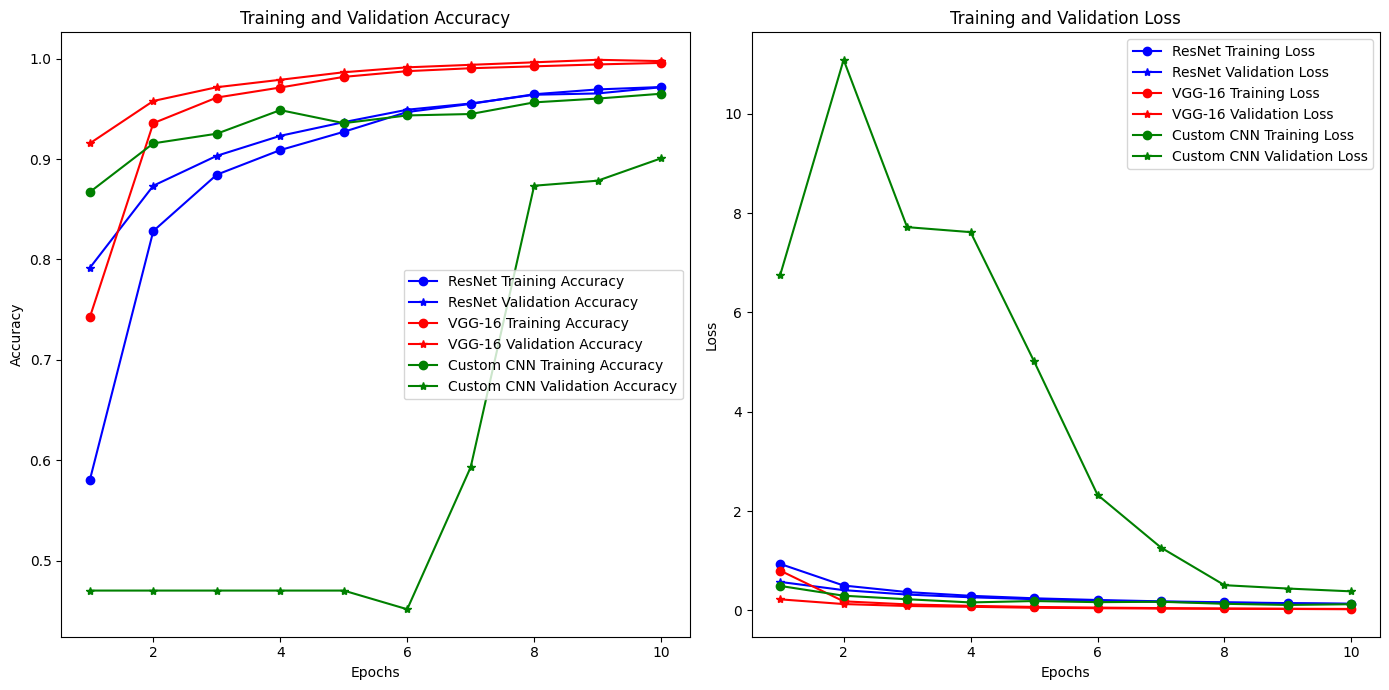

In [19]:
import matplotlib.pyplot as plt

# Epochs
epochs = list(range(1, 11))

# Data for each model
# ResNet50
resnet_training_acc = [0.5803, 0.8283, 0.8844, 0.9089, 0.9271, 0.9468, 0.9549, 0.9645, 0.9693, 0.9717]
resnet_validation_acc = [0.7916, 0.8734, 0.9032, 0.9231, 0.9367, 0.9491, 0.9553, 0.9640, 0.9653, 0.9715]
resnet_training_loss = [0.9346, 0.4988, 0.3671, 0.2920, 0.2417, 0.2073, 0.1804, 0.1608, 0.1443, 0.1311]
resnet_validation_loss = [0.5715, 0.4062, 0.3169, 0.2621, 0.2239, 0.1928, 0.1711, 0.1550, 0.1395, 0.1287]

# VGG-16
vgg_training_acc = [0.7424, 0.9357, 0.9612, 0.9712, 0.9818, 0.9875, 0.9904, 0.9923, 0.9942, 0.9957]
vgg_validation_acc = [0.9156, 0.9578, 0.9715, 0.9789, 0.9864, 0.9913, 0.9938, 0.9963, 0.9988, 0.9975]
vgg_training_loss = [0.7997, 0.1806, 0.1189, 0.0896, 0.0675, 0.0544, 0.0440, 0.0365, 0.0312, 0.0271]
vgg_validation_loss = [0.2204, 0.1258, 0.0865, 0.0704, 0.0510, 0.0424, 0.0346, 0.0298, 0.0267, 0.0210]

# 15-layer Custom CNN
custom_training_acc = [0.8671, 0.9156, 0.9252, 0.9487, 0.9357, 0.9434, 0.9448, 0.9564, 0.9602, 0.9650]
custom_validation_acc = [0.4702, 0.4702, 0.4702, 0.4702, 0.4702, 0.4516, 0.5931, 0.8734, 0.8784, 0.9007]
custom_training_loss = [0.4909, 0.2936, 0.2228, 0.1585, 0.1864, 0.1641, 0.1717, 0.1308, 0.1079, 0.1223]
custom_validation_loss = [6.7519, 11.0898, 7.7189, 7.6182, 5.0163, 2.3255, 1.2633, 0.5058, 0.4381, 0.3814]

# Plotting Accuracy Graph
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(epochs, resnet_training_acc, 'bo-', label='ResNet Training Accuracy')
plt.plot(epochs, resnet_validation_acc, 'b*-', label='ResNet Validation Accuracy')
plt.plot(epochs, vgg_training_acc, 'ro-', label='VGG-16 Training Accuracy')
plt.plot(epochs, vgg_validation_acc, 'r*-', label='VGG-16 Validation Accuracy')
plt.plot(epochs, custom_training_acc, 'go-', label='Custom CNN Training Accuracy')
plt.plot(epochs, custom_validation_acc, 'g*-', label='Custom CNN Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss Graph
plt.subplot(1, 2, 2)
plt.plot(epochs, resnet_training_loss, 'bo-', label='ResNet Training Loss')
plt.plot(epochs, resnet_validation_loss, 'b*-', label='ResNet Validation Loss')
plt.plot(epochs, vgg_training_loss, 'ro-', label='VGG-16 Training Loss')
plt.plot(epochs, vgg_validation_loss, 'r*-', label='VGG-16 Validation Loss')
plt.plot(epochs, custom_training_loss, 'go-', label='Custom CNN Training Loss')
plt.plot(epochs, custom_validation_loss, 'g*-', label='Custom CNN Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
